# Trends over time 

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import time
import datetime
import os 
from tqdm import tqdm

In [39]:
place = "Linköping"
job_title = "Software Developer"
#data_dir = './results/pi-data/results/'
data_dir = './results/'

In [40]:
count = 0
for file in os.listdir(data_dir):
    if file.endswith('.csv') and place in file:
        #print(f'Processing file: {file}')
        count += 1
print(f'Total number of files for {place}: {count}')

Total number of files for Linköping: 16


In [41]:
all_jobs_dfs = []
for file in tqdm(os.listdir(data_dir)):
    if file.endswith('.csv') and place in file and file.startswith('jobs_'):
        date = file.split("_")[-1].replace('.csv','')
        df = pd.read_csv(os.path.join(data_dir, file))
        df['date'] = date
        all_jobs_dfs.append(df)
print(f'Total number of dataframes collected: {len(all_jobs_dfs)}')

100%|██████████| 35/35 [00:00<00:00, 7311.15it/s]

Total number of dataframes collected: 4


In [42]:
all_jobs_dfs[-1].head()

,job_title,company_name,location,time_posted,num_applicants,date
0,Embedded Software Developer,Softube AB,Linköping,3 weeks ago,0,2025-12-09
1,Developer: PC-plattformar & MCU-utveckling,Saab,Linköping,1 week ago,0,2025-12-09
2,System Developer to Linköping!,TMC Sweden,Linköping,3 weeks ago,33,2025-12-09
3,"Software Developer, Backend - Sectra Medical",Sectra,Linköping,1 week ago,0,2025-12-09
4,Software Engineer,Voyado,Norrköping,3 days ago,66,2025-12-09


In [43]:
skip_file = "./skip.csv"
skip_companies = pd.read_csv(skip_file)["company_name"].to_list()

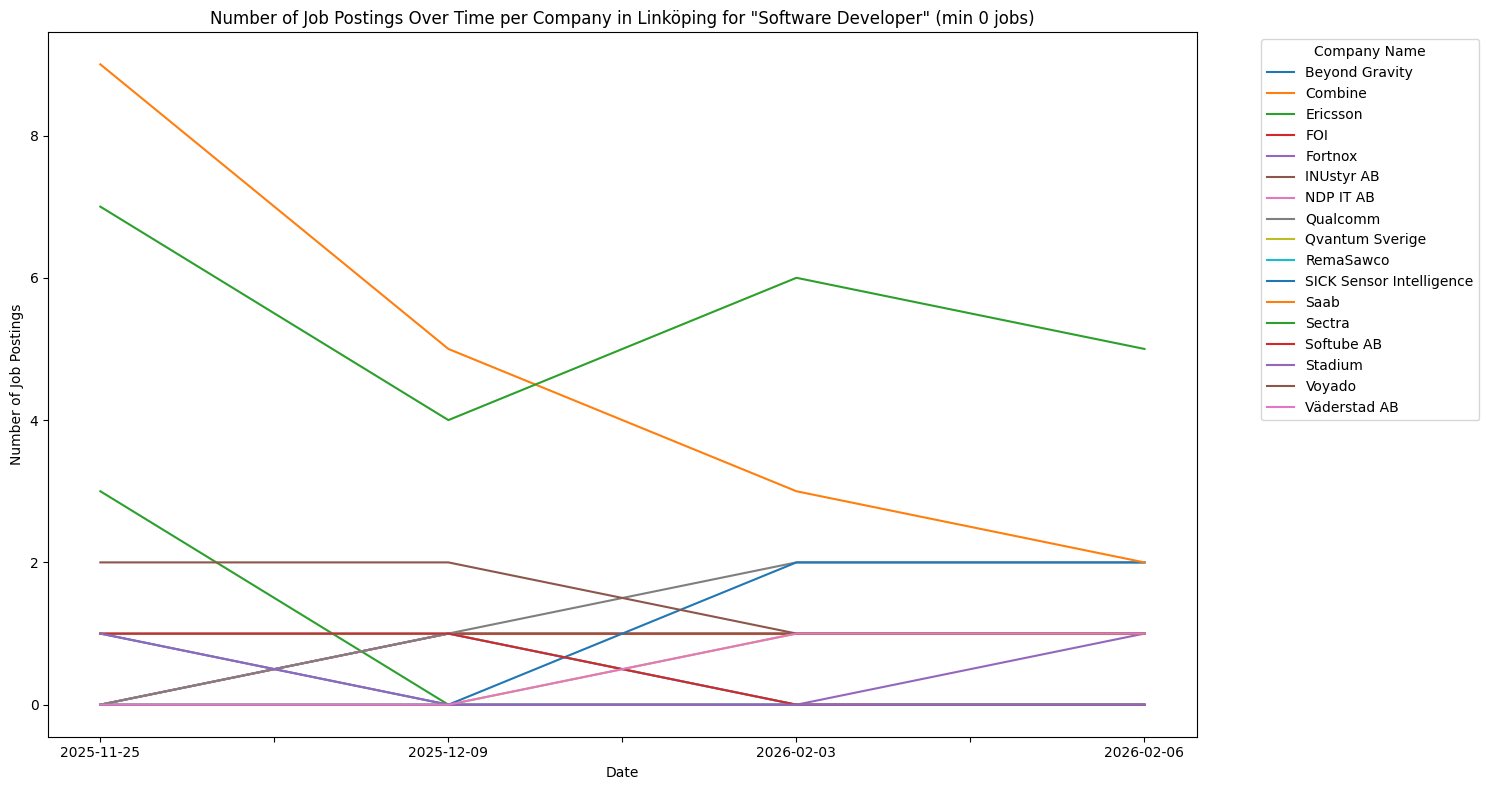

In [44]:
minimum_number_of_jobs = 0
jobs_over_time = pd.concat(all_jobs_dfs)
jobs_over_time_grouped = jobs_over_time.groupby(['date', 'company_name']).size().reset_index(name='job_count')
jobs_over_time_grouped = jobs_over_time_grouped[jobs_over_time_grouped['job_count'] >= minimum_number_of_jobs]
jobs_over_time_grouped = jobs_over_time_grouped[~jobs_over_time_grouped["company_name"].isin(skip_companies)]
jobs_over_time_pivot = jobs_over_time_grouped.pivot(index='date', columns='company_name', values='job_count').fillna(0)
jobs_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Job Postings Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_jobs} jobs)')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
labels = str(jobs_over_time_grouped.date.tolist())

In [46]:
jobs_over_time_grouped.head(10)

,date,company_name,job_count
1,2025-11-25,Beyond Gravity,1
3,2025-11-25,Combine,1
6,2025-11-25,Ericsson,3
12,2025-11-25,RemaSawco,1
13,2025-11-25,Saab,9
14,2025-11-25,Sectra,7
15,2025-11-25,Softube AB,1
16,2025-11-25,Stadium,1
19,2025-11-25,Voyado,2
23,2025-12-09,Combine,1


In [47]:
jobs_over_time_pivot.index

Index(['2025-11-25', '2025-12-09', '2026-02-03', '2026-02-06'], dtype='object', name='date')

In [48]:
import ipychart as ipc 


#chrt = ipc.Chart(data=jobs_over_time_pivot, kind="line")
#chrt

In [ ]:
plot_set_job_postings = [] 
labels = jobs_over_time_grouped['date'].unique().tolist()
for c in jobs_over_time_grouped["company_name"].unique().tolist():
    comp_data = jobs_over_time_grouped[jobs_over_time_grouped["company_name"] == c]
    jobs_postings = comp_data["job_count"].to_list()
    if len(jobs_postings) < len(labels):
        _tmp_jobs_postings = []
        for d in labels:
            if not d in comp_data["date"].unique().tolist(): 
                _tmp_jobs_postings.append(0)
            else: 
                exsiting = comp_data[comp_data["date"] == d].iloc[0]["job_count"].item()
                _tmp_jobs_postings.append(exsiting)
        jobs_postings = _tmp_jobs_postings

    plot_set_job_postings.append({
        "label": c,
        "data": jobs_postings,
    })

opt = {
    "scales": {
        "y": {
            "beginAtZero": True
        }
    },
    "plugins": {
        "title": {
            "display": True,
            "text": "Number of job postings",
            "font": {"size": 30, "color": "black", "style": "italic"},
        }
    }
}

chrt = ipc.Chart({"datasets":plot_set_job_postings,"labels":labels}, "line", colorscheme="tableau.ClassicLight10", options=opt)
chrt.to_html("./www/test.html")
chrt


Chart(layout=Layout(align_self='stretch', height='auto'))

In [ ]:

config = {
    "data":{
        "labels":labels, 
        "datasets":plot_set_job_postings,
    },
    "type":"line", 
    "colorscheme":"tableau.ClassicLight10", 
    "options":opt
}

charts_names = ["numjobs","jobsTwo"]
charts_setups = [config, config]

html = f"""
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>LinkedIn data {place} for {job_title} </title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
</head>

<body>
    <h1 style="text-align: center;font-family: Arial, sans-serif;">
    Linkedin Job data from {place} for {job_title}</h1>

    <div style="width: 900px;margin-left: 27%;">
    {"<br>".join([f"<canvas id='{c}'></canvas>" for c in charts_names])}
        
        
    </div>

    <script>
    {
        "\n".join([
           f"""
            new Chart(
                document.getElementById('{charts_names[idx]}').getContext('2d'), 
                {conf}
            );
           """ 
            for idx, conf in enumerate(charts_setups)
        ])
    }
    </script>


</body>

</html>
""".replace("True", "true")

with open("./www/test.html", "w") as f:
    f.write(html)